In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('First _six_months_data.csv')

## **Data cleaning and data exploration**

### Delete some columns that we do not need

In [30]:
df.drop(columns=['STT', 'Miền', 'Vùng', 'Khu vực', 'Số nhà/Khu', 'Tên đường/Xã/Phường', 'TP (Tx)/Quận (Huyện)', 'Trạng thái', 'Hàng bán (Hộp/bịch)', 'Hàng KM (Thùng)', 'Hàng KM (hộp/bịch)', 'Đơn giá lẻ','Chiết khấu (Lì xì)', 'Mã CTKM \n (Mua hàng/Voucher/Phiếu thu hồi)', 'Tên CTKM \n (Mua hàng/Voucher/Phiếu thu hồi)','Số lượng/Điểm trả thưởng \n (Game/Voucher/Loyalty)','Mã chương trình \n (Game/Voucher/Loyalty)',' Tên chương trình \n (Game/Voucher/Loyalty)'], inplace=True)

### Show infomation of the dataset

In [31]:
type = df['Loại đơn'].unique()
df = df[df['Loại đơn'] == type[1]]
df.drop(columns=['Loại đơn'], inplace=True)

### Chage data type from object to datetime

In [32]:
df['Ngày lấy đơn'] = pd.to_datetime(df['Ngày lấy đơn'], dayfirst=True)

# **Show sale all months**

### Extract month from datetime

In [33]:
df['Tháng lấy đơn'] = df['Ngày lấy đơn'].dt.strftime('%B')

In [34]:
df['Tháng'] = df['Ngày lấy đơn'].dt.month

In [35]:
df_sales = df.groupby(['Tháng lấy đơn', 'Tháng'])['Thành tiền'].sum().reset_index()
df_sales = df_sales.sort_values('Tháng', ascending=True)
df_sales.drop(columns=['Tháng'], inplace=True)

## Visualization

### Chart decoration details

In [36]:
decor = {'color':'#6EB43F', 'fontsize' : 12, 'fontweight' : '600'}

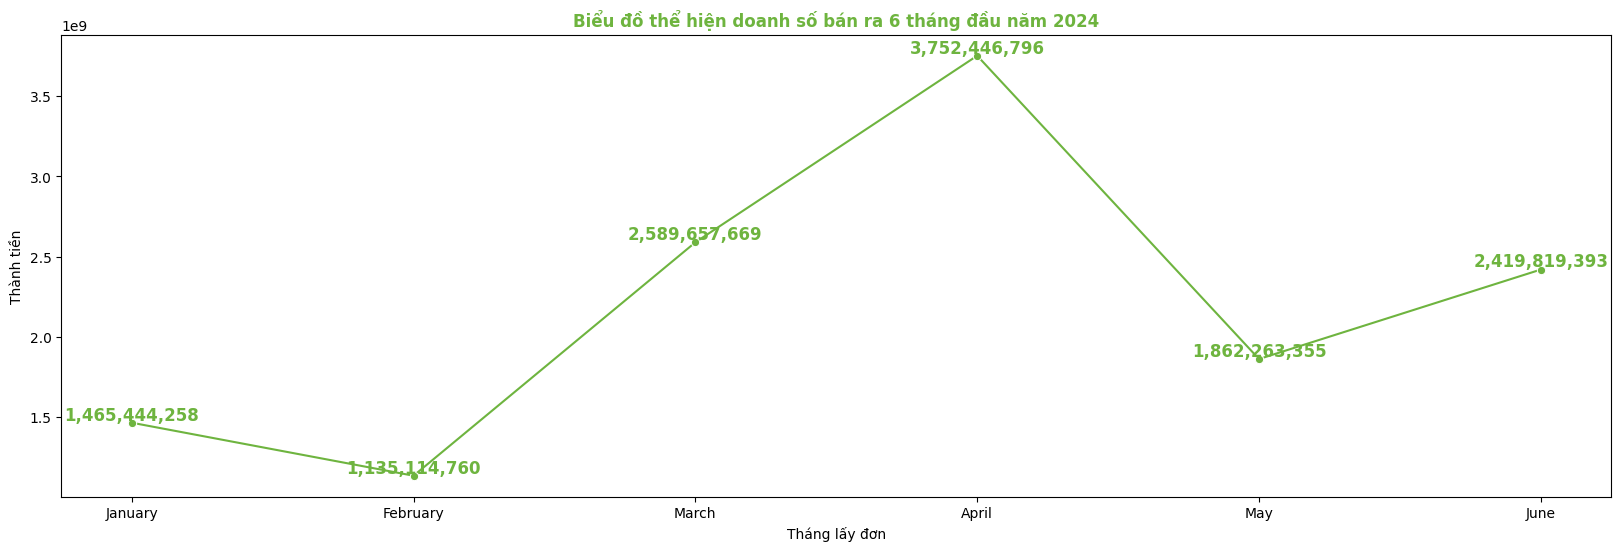

In [37]:
plt.figure(figsize=(20,6))
sns.lineplot(df_sales,
             x = 'Tháng lấy đơn',
             y = 'Thành tiền',
             marker='o',
             color='#6EB43F'
             )
plt.title('Biểu đồ thể hiện doanh số bán ra 6 tháng đầu năm 2024', fontdict=decor)
for x, y in zip(df_sales['Tháng lấy đơn'], df_sales['Thành tiền']):
    label = "{:,.0f}".format(y)  # Định dạng số thập phân cho label
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,2), ha='center', color='#6EB43F', fontsize = 12, fontweight = '600');

# **Visualize product name and name of supermarket systems**

### Extract name of systems from name of customers

In [38]:
df['Hệ thống'] = df['Tên KH'].str.split(' ')
df['Hệ thống'] = df['Hệ thống'].apply(lambda x: x[0])

### Change name of systems

In [39]:
df['Hệ thống'] = df['Hệ thống'].map({
    'BHX': 'Bách Hóa Xanh',
    'Coopfood': 'Sài Gòn Coop',
    'Coopmart': 'Sài Gòn Coop',
    'Lotte': 'Lotte Mart',
    'VM': 'Vincommerce',
    'VMP': 'Vincommerce',
    'BigC': 'BigC và Go!',
})

In [40]:
df_systems = pd.pivot_table(df, columns='Hệ thống', index='Tên sản phẩm', aggfunc='sum', values='Hàng bán (Thùng)')

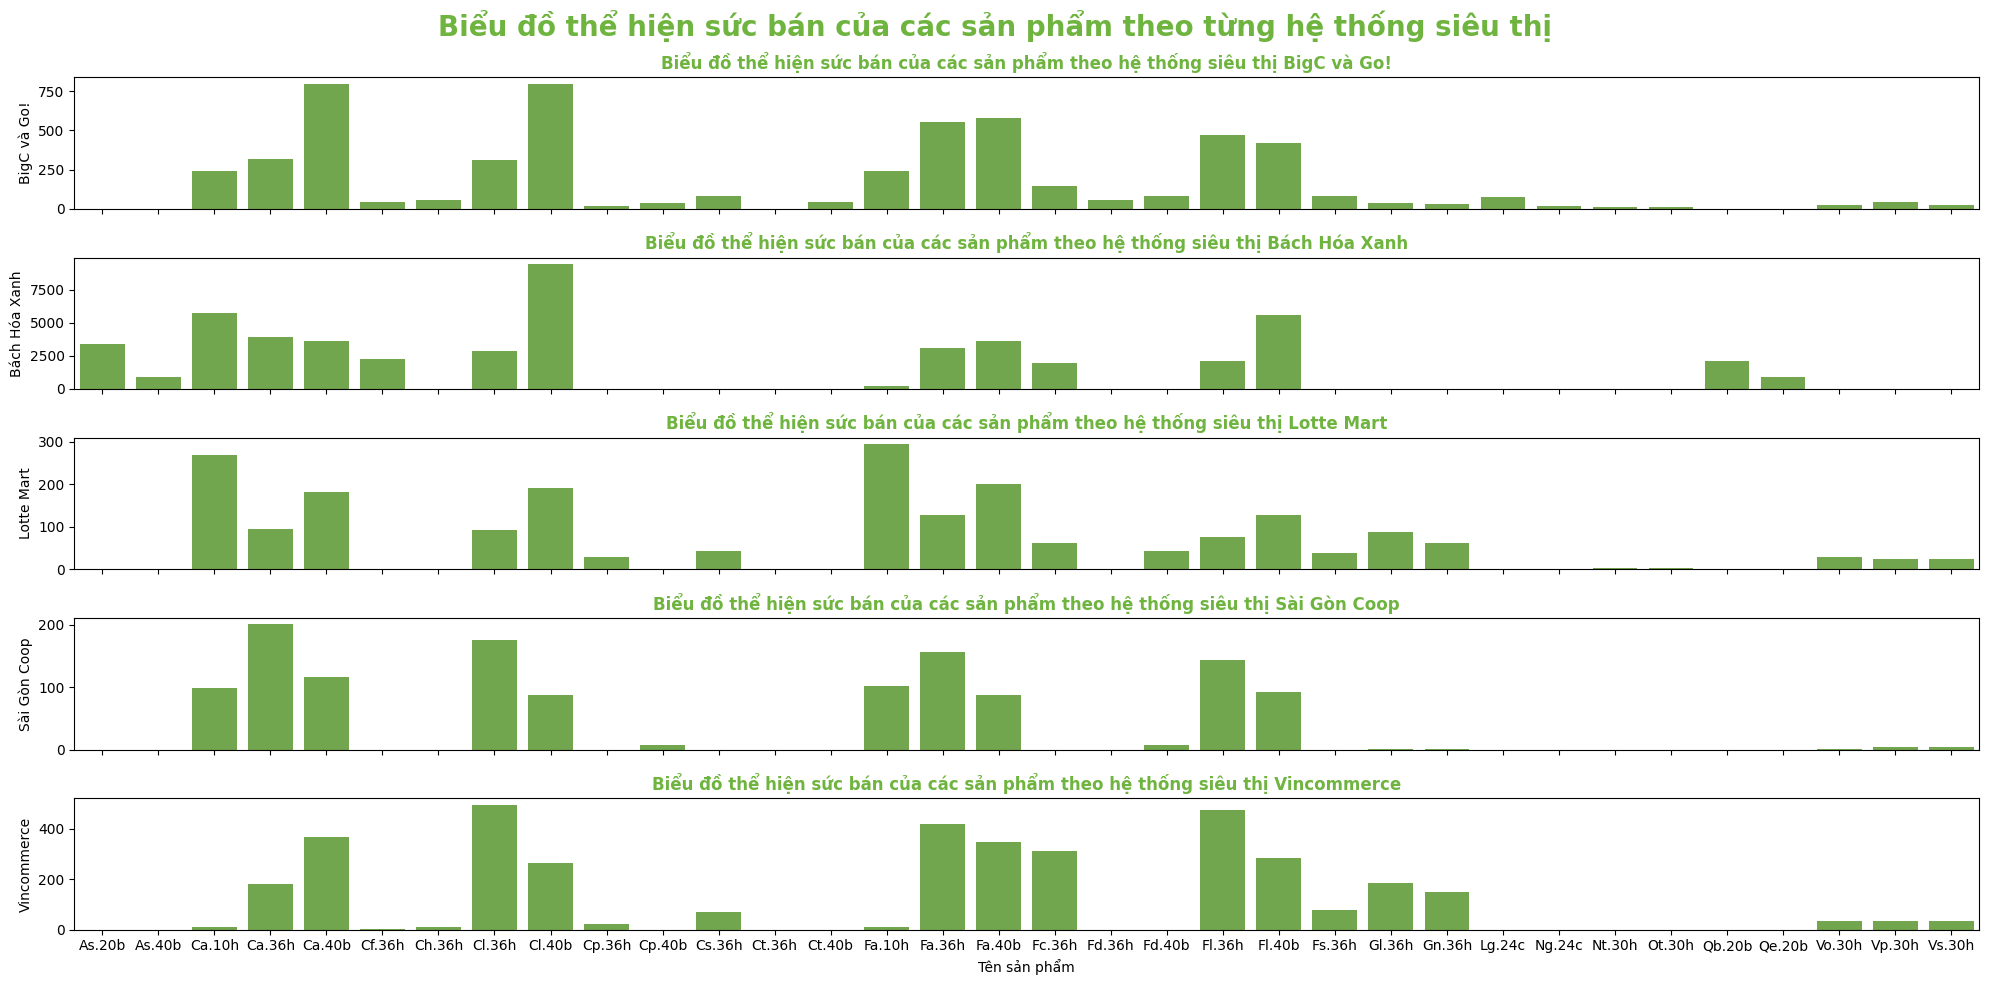

In [41]:
fig, ax = plt.subplots(len(df_systems.columns), 1, figsize=(20, 10), sharex=True)
# Vòng lặp để vẽ từng biểu đồ cột trên từng subplot
plt.suptitle('Biểu đồ thể hiện sức bán của các sản phẩm theo từng hệ thống siêu thị', color='#6EB43F', fontweight = '600', fontsize = 20)
for i, col in enumerate(df_systems.columns):
    sns.barplot(x=df_systems.index, y=df_systems[col], ax=ax[i], color='#6EB43F')
    ax[i].set_ylabel(col)  # Đặt nhãn trục y cho từng subplot
    ax[i].set_xlabel('Tên sản phẩm')
    ax[i].set_title(f"Biểu đồ thể hiện sức bán của các sản phẩm theo hệ thống siêu thị {col}", color='#6EB43F', fontweight = '600')
# plt.title('Biểu đồ thể hiện sức bán của các sản phẩm theo từng hệ thống siêu thị')
plt.tight_layout()

# **Find quality of each order by order ID**

In [42]:
df_qual = df.groupby(['Hệ thống']).agg(
                            Total = ('Hàng bán (Thùng)', 'sum'),
                            Orders = ('Mã đơn hàng', 'nunique')
                            ).reset_index()

df_qual['CLĐH'] = round(df_qual['Total'] / df_qual['Orders'], 2)
df_qual.rename(columns={'Orders': 'Đơn hàng thành công', 'CLĐH': 'Chất lượng đơn hàng'}, inplace=True)

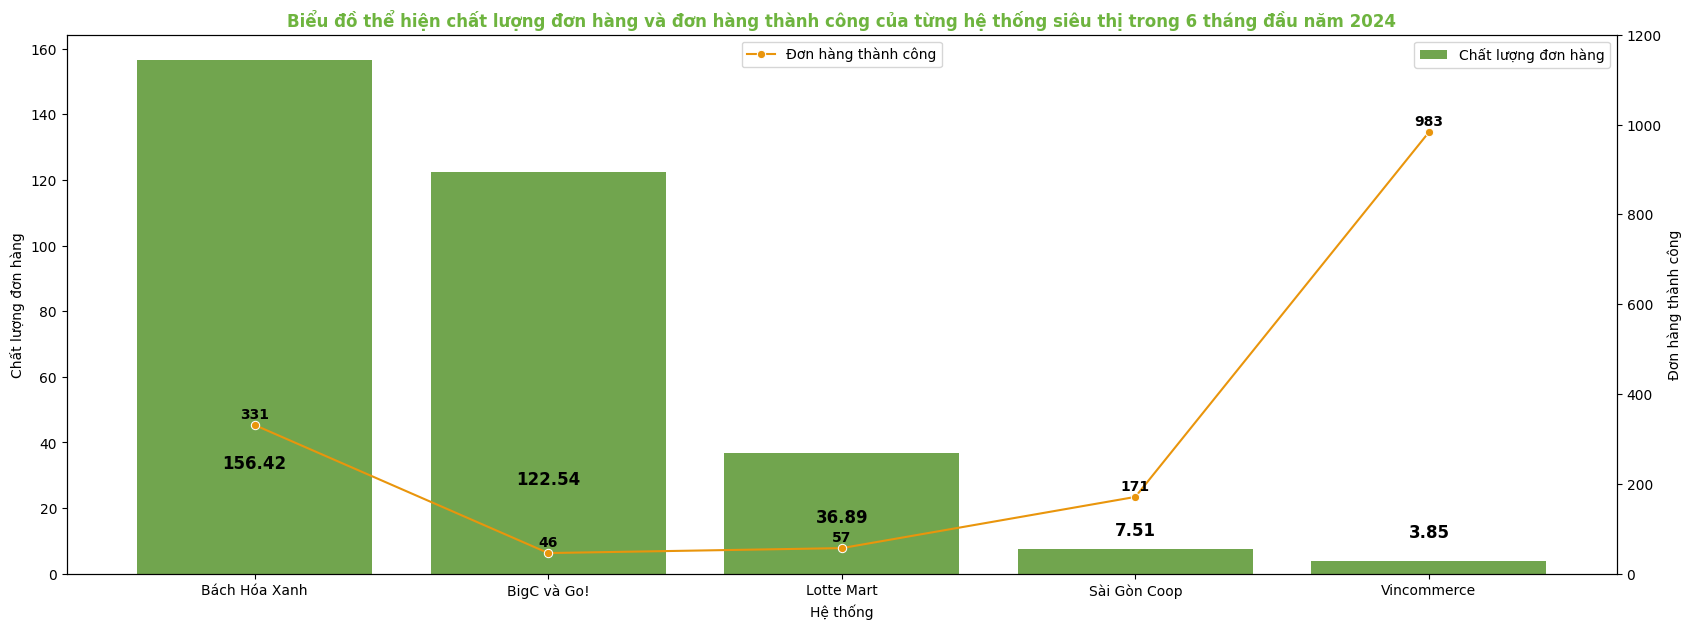

In [43]:
df_qual = df_qual.sort_values('Chất lượng đơn hàng', ascending=False)
plt.figure(figsize=(20,7))
sns.barplot(df_qual, x='Hệ thống', y='Chất lượng đơn hàng', color='#6EB43F', label='Chất lượng đơn hàng')

# Second plot
secondChart = plt.twinx()
sns.lineplot(df_qual, x = 'Hệ thống', y = 'Đơn hàng thành công', marker='o', color='#E9950C', label='Đơn hàng thành công')

plt.title(f'Biểu đồ thể hiện chất lượng đơn hàng và đơn hàng thành công của từng hệ thống siêu thị trong 6 tháng đầu năm 2024', fontdict=decor)
plt.xlabel('Hệ thống siêu thị')
plt.ylim(0, 1200)

plt.legend(loc='upper center')

for x, y in zip(df_qual['Hệ thống'], df_qual['Chất lượng đơn hàng']):
    label = "{:,.2f}".format(y)  # Định dạng số thập phân cho label
    plt.annotate(label, xy=(x, y), textcoords='offset points', xytext=(0,25), ha='center', color='#000', fontsize = 12, fontweight = '600')
    
for t, z in zip(df_qual['Hệ thống'], df_qual['Đơn hàng thành công']):
    label1 = "{:,.0f}".format(z)  # Định dạng số thập phân cho label
    plt.annotate(label1, xy=(t, z), textcoords='offset points', xytext=(0,5), ha='center', color='#000', fontsize = 10, fontweight = '600')

# **Find quantity of orders and quality of each ordereach month**

In [44]:
orders = df.groupby(['Tháng lấy đơn', 'Tháng']).agg({'Hàng bán (Thùng)': 'sum', 'Mã đơn hàng': 'nunique'}).reset_index()
orders = orders.sort_values('Tháng', ascending=True)
orders = orders.rename(columns={'Hàng bán (Thùng)': 'Sản lượng', 'Mã đơn hàng': 'Đơn hàng thành công'})
orders.drop(columns='Tháng', inplace=True)
orders['Chất lượng đơn hàng'] = round(orders['Sản lượng'] / orders['Đơn hàng thành công'], 2)

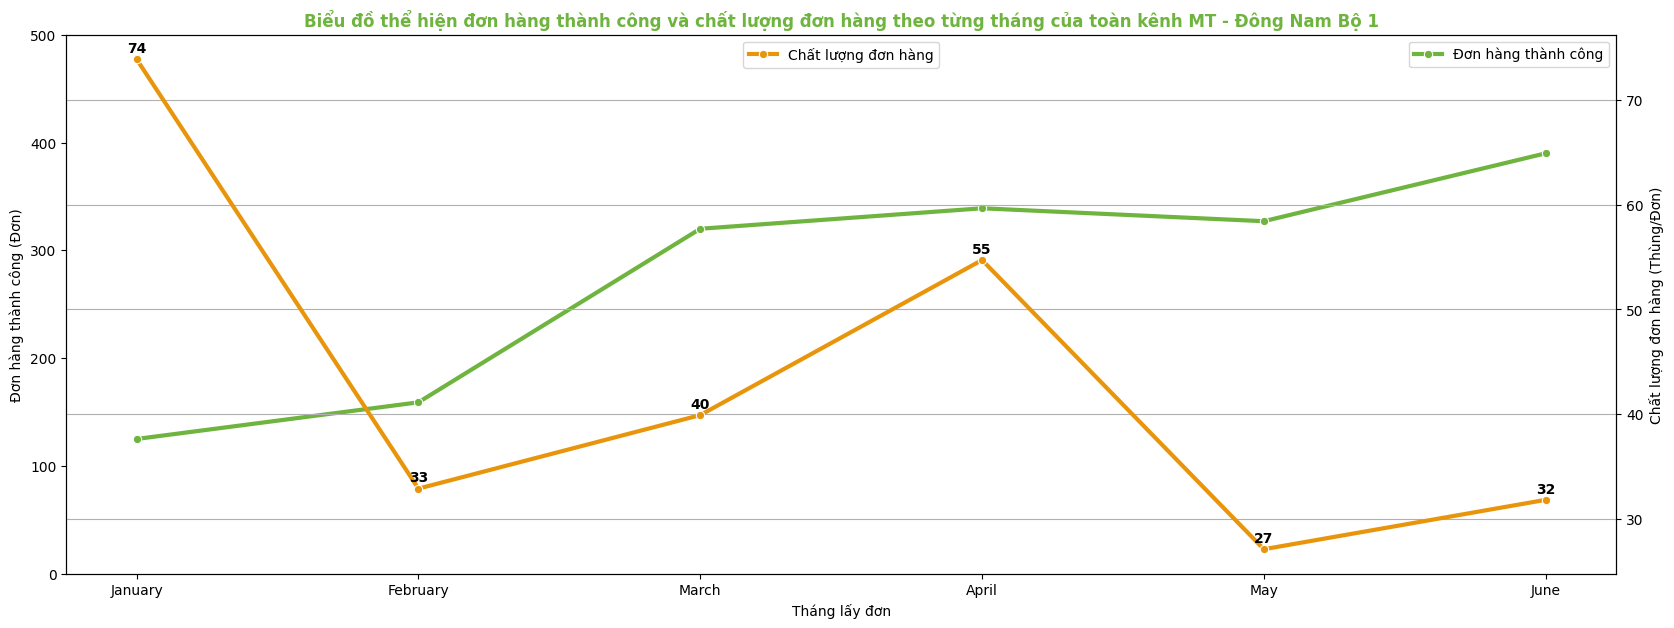

In [45]:
plt.figure(figsize=(20,7))
sns.lineplot(orders, x='Tháng lấy đơn', y='Đơn hàng thành công', marker='o', color='#6EB43F', label='Đơn hàng thành công', linewidth='3')
plt.ylabel('Đơn hàng thành công (Đơn)')
plt.ylim((0,500))
plt.twinx()
sns.lineplot(orders, x='Tháng lấy đơn', y='Chất lượng đơn hàng', marker='o', color='#E9950C', label='Chất lượng đơn hàng', linewidth='3')
plt.ylabel('Chất lượng đơn hàng (Thùng/Đơn)')
plt.legend(loc='upper center')
plt.grid()
plt.title('Biểu đồ thể hiện đơn hàng thành công và chất lượng đơn hàng theo từng tháng của toàn kênh MT - Đông Nam Bộ 1', color='#6EB43F', fontweight = '600')
for x, y in zip(orders['Tháng lấy đơn'], orders['Đơn hàng thành công']):
    label = "{:,.2f}".format(y)  # Định dạng số thập phân cho label
    plt.annotate(label, xy=(x, y), textcoords='offset points', xytext=(0,5), ha='center', color='#000', fontsize = 12, fontweight = '600')
    
for t, z in zip(orders['Tháng lấy đơn'], orders['Chất lượng đơn hàng']):
    label1 = "{:,.0f}".format(z)  # Định dạng số thập phân cho label
    plt.annotate(label1, xy=(t, z), textcoords='offset points', xytext=(0,5), ha='center', color='#000', fontsize = 10, fontweight = '600')

# **Visualize sales of all contrbutors in team**

## Create pivot table

In [46]:
contributors = pd.pivot_table(df.sort_values('Tháng', ascending=True), index=['Tháng','Tháng lấy đơn'], columns='Tên NPP', values='Thành tiền', aggfunc='sum')

## Visualization

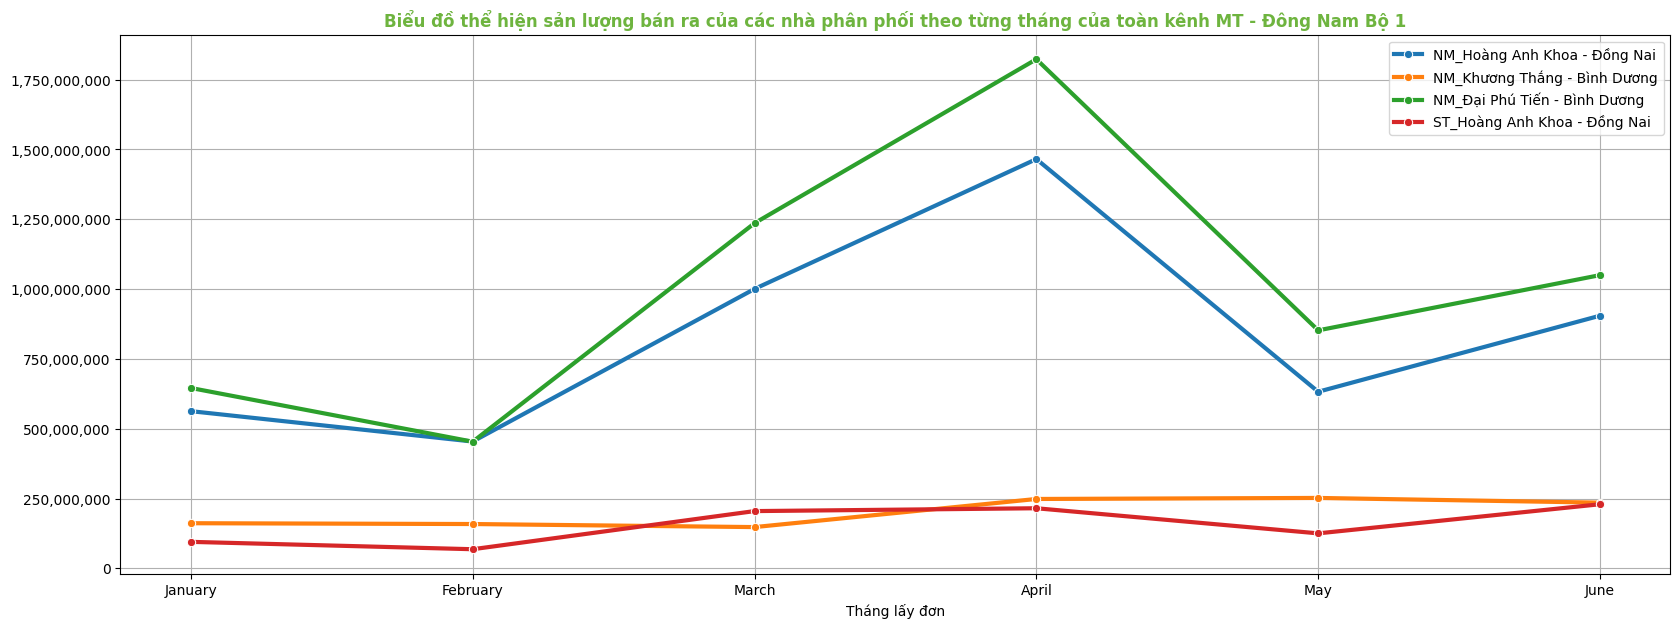

In [47]:
import matplotlib.ticker as ticker
plt.figure(figsize=(20,7))
for contributor in contributors.columns:
    sns.lineplot(contributors, x='Tháng lấy đơn', y=contributor, label=contributor, linewidth=3, marker='o')
    plt.legend(loc='upper right')
    plt.ylabel('')
plt.grid()
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)
plt.title('Biểu đồ thể hiện sản lượng bán ra của các nhà phân phối theo từng tháng của toàn kênh MT - Đông Nam Bộ 1', color='#6EB43F', fontweight = '600');

# **Analyze sales of MT systems in each contributors**

In [48]:
systems = pd.pivot_table(df.sort_values('Tháng', ascending=True), index=['Hệ thống'], columns=['Tên NPP'], values='Thành tiền', aggfunc='sum')

C:\Users\PCPV\AppData\Local\Temp\ipykernel_11416\4075566843.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Xoay nhãn trục x
C:\Users\PCPV\AppData\Local\Temp\ipykernel_11416\4075566843.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Xoay nhãn trục x
C:\Users\PCPV\AppData\Local\Temp\ipykernel_11416\4075566843.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Xoay nhãn trục x
C:\Users\PCPV\AppData\Local\Temp\ipykernel_11416\4075566843.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e.

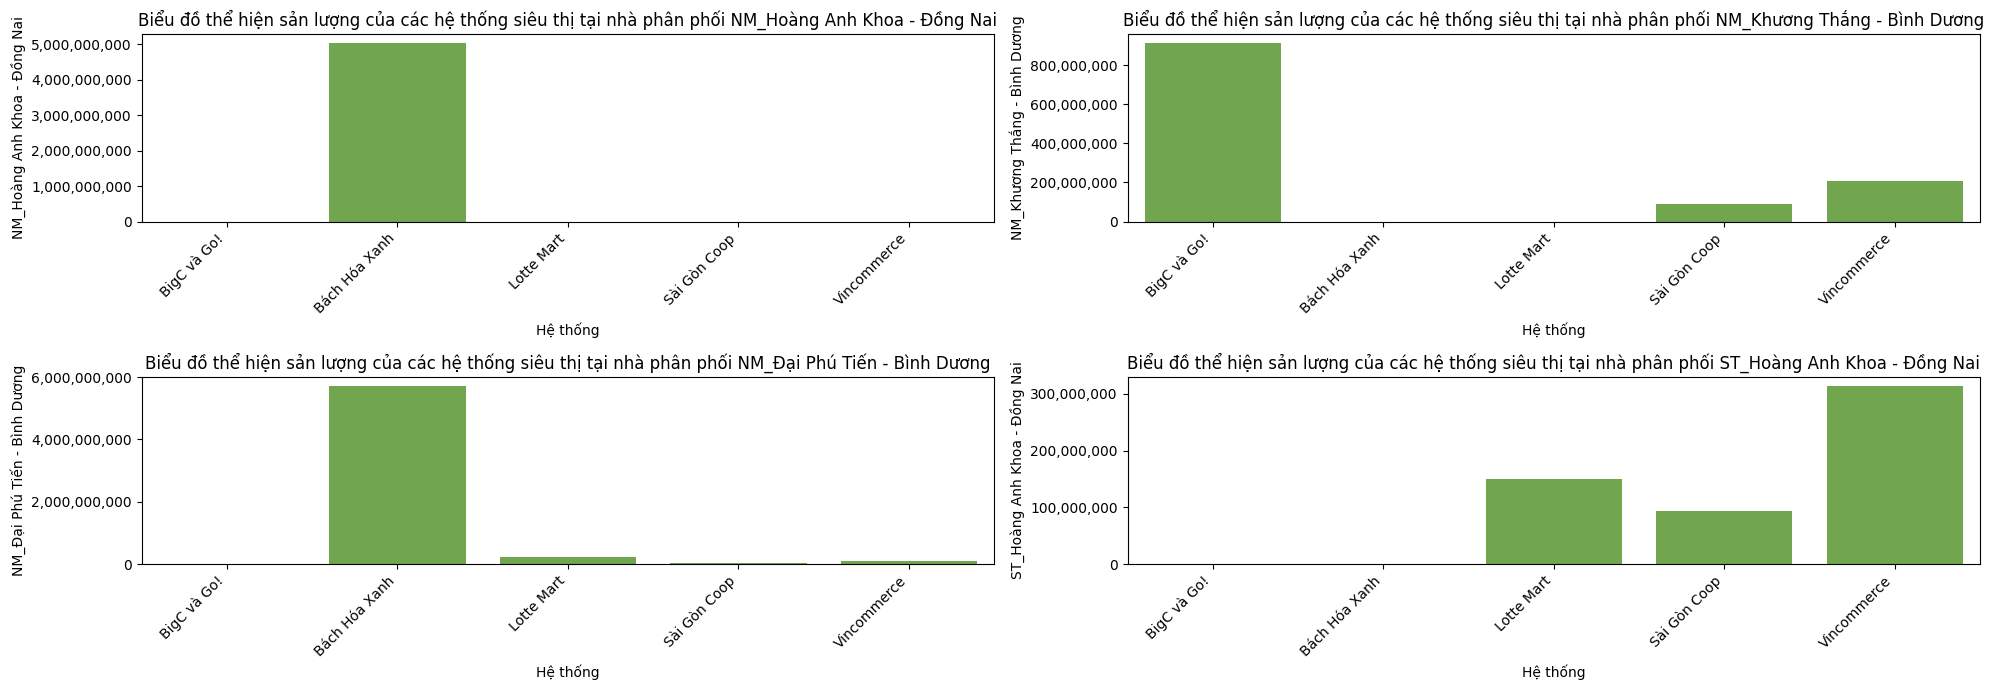

In [49]:
# Tạo subplot
fig, axs = plt.subplots(2, 2, figsize=(20, 7))

# Flat list của các subplot axes
axes = axs.flatten()
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))

# Vẽ biểu đồ thanh cho mỗi NPP
for ax, npp in zip(axes, systems.columns):  # Bỏ qua cột 'Hệ thống'
    sns.barplot(data=systems.sort_values('Hệ thống', ascending=True), x='Hệ thống', y=npp, ax=ax, color='#6EB43F')
    ax.set_title(f'Biểu đồ thể hiện sản lượng của các hệ thống siêu thị tại nhà phân phối {npp}')  # Đặt tiêu đề cho từng subplot
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Xoay nhãn trục x
    ax.yaxis.set_major_formatter(formatter)

# Điều chỉnh layout
plt.tight_layout();

# **SKUs that was dropped down in last six months**

## Filter df just with 'Ca.10h', 'Vp.30h', 'Vs.30h', 'Vo.30h', 'Fs.36h', 'Fa.10h', 'Cp.36h'

In [50]:
skusDrop = ['Ca.10h', 'Vp.30h', 'Vs.30h', 'Vo.30h', 'Fs.36h', 'Fa.10h', 'Cp.36h']

df_drop = df[(df['Tên sản phẩm'].isin(skusDrop)) & (df['Tên NPP'] == 'ST_Hoàng Anh Khoa - Đồng Nai')]

## Visualization dropped skus

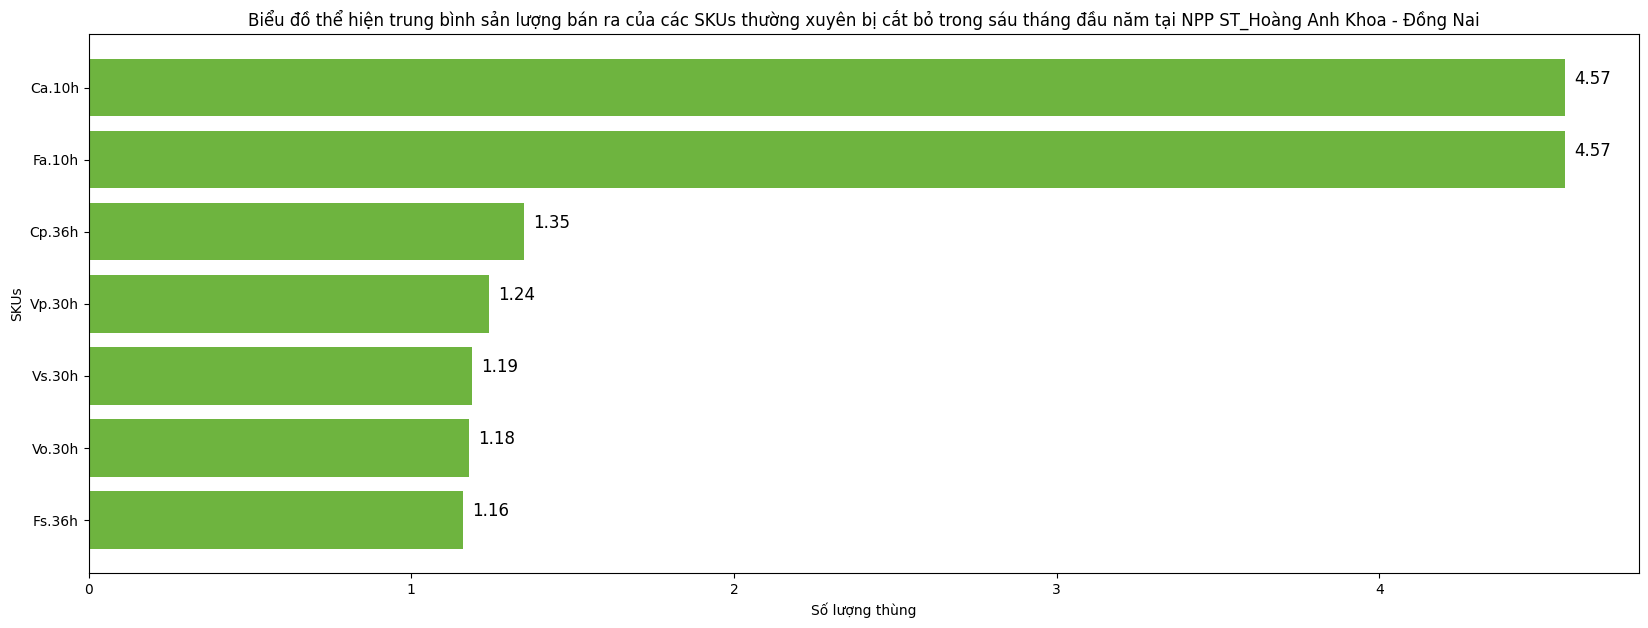

In [57]:
df_drop_sum = df_drop.groupby('Tên sản phẩm').agg({'Hàng bán (Thùng)': 'mean'}).reset_index()
# df_drop_sum['Trung bình'] = round(df_drop_sum['Hàng bán (Thùng)'] / 6, 2)
df_drop_sum = df_drop_sum.sort_values('Hàng bán (Thùng)', ascending=True)
plt.figure(figsize=(20,7))
plt.barh(df_drop_sum['Tên sản phẩm'], df_drop_sum['Hàng bán (Thùng)'], color='#6EB43F')
plt.title(f'Biểu đồ thể hiện trung bình sản lượng bán ra của các SKUs thường xuyên bị cắt bỏ trong sáu tháng đầu năm tại NPP {df_drop['Tên NPP'].unique()[0]}')
plt.xlabel('Số lượng thùng')
plt.ylabel('SKUs')
for x, y in zip(df_drop_sum['Tên sản phẩm'], df_drop_sum['Hàng bán (Thùng)']):
    label = "{:,.2f}".format(y)  # Định dạng số thập phân cho label
    plt.annotate(label, xy=(y, x), textcoords='offset points', xytext=(20,3), ha='center', color='#000', fontsize = 12, fontweight = '500');